Notebook to demonstrate random variate generation using the inverse transform method. ITM generates pseudo random numbers from any distribution given its cdf, and uniform samples. 

Inverse Transform Theorem states that if X is a continuous random variable with cdf F(x), then F(X) ~ Unif(0,1).

https://en.wikipedia.org/wiki/Inverse_transform_sampling

ITM has the following procedure:
To generate a random variable X, of some distribution,
1. Generate a Uniform(0, 1) random variable
2. Use the inverse of the CDF of the distribution to get X. i.e. $$F^{-1}(U) = X$$

If you have this inverse pre-calculated (easy for some distributions), you can use numpy to generate the X's. If you are lazy, sympy is a symbolic math library that lets you perform mathematical operations; in particular the stats module can be used to do the math for you. 

[Note, that the functionality may change in future versions of sympy, and this notebook is using sympy=1.6.2]


In [1]:
# requires sympy==1.6.2
!pip install sympy==1.6.2

     |████████████████████████████████| 5.8MB 2.7MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [2]:
import sympy
sympy.__version__

'1.6.2'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.stats import cdf, density
from sympy import Symbol, pprint, Eq, solve, solveset
from sympy.utilities.lambdify import lambdify
from sympy import integrate

In [4]:
# set your favorite seed for reproducibility
np.random.seed(42)

# **Continuous Distributions**

(array([493., 538., 503., 509., 501., 507., 503., 503., 523., 495., 528.,
        505., 493., 512., 471., 451., 515., 487., 487., 476.]),
 array([1.00010471, 1.44997243, 1.89984015, 2.34970786, 2.79957558,
        3.2494433 , 3.69931102, 4.14917873, 4.59904645, 5.04891417,
        5.49878189, 5.9486496 , 6.39851732, 6.84838504, 7.29825276,
        7.74812047, 8.19798819, 8.64785591, 9.09772362, 9.54759134,
        9.99745906]),
 <a list of 20 Patch objects>)

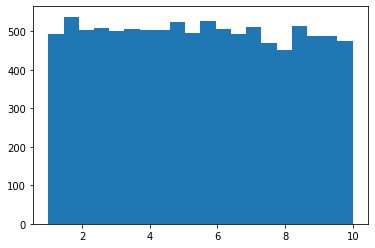

In [5]:
# Uniform Distribution
# It is easy to get an expression for X from the inverse cdf.
# You may recall that the cdf of a uniform is (x-a)/(b-a). 
# Solving for X, we get the expresssion X = a + (b-a) * U

n = 10000
n_bins = 20
a, b = 1, 10

u = np.random.uniform(0, 1, n)
x = a + (b-a)*u

plt.hist(x, bins = n_bins)

cdf
⎧  0     for a > x
⎪                 
⎪-a + x           
⎨──────  for b ≥ x
⎪-a + b           
⎪                 
⎩  1     otherwise


(array([482., 516., 492., 452., 523., 506., 520., 498., 506., 483., 508.,
        487., 551., 521., 506., 488., 514., 458., 493., 496.]),
 array([4.81238943e-04, 5.00407666e-01, 1.00033409e+00, 1.50026052e+00,
        2.00018695e+00, 2.50011337e+00, 3.00003980e+00, 3.49996622e+00,
        3.99989265e+00, 4.49981908e+00, 4.99974550e+00, 5.49967193e+00,
        5.99959836e+00, 6.49952478e+00, 6.99945121e+00, 7.49937764e+00,
        7.99930406e+00, 8.49923049e+00, 8.99915692e+00, 9.49908334e+00,
        9.99900977e+00]),
 <a list of 20 Patch objects>)

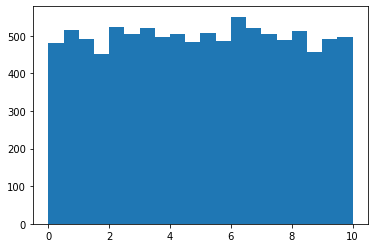

In [7]:
# Now to do it with sympy, it may seem like more code, but
# in this case, we can use sympy to solve for X, instead of doing it ourselves.
# This is a (trivial) example to generate a Unif(a, b) from Unif(0,1)

from sympy.stats import Uniform

x = Symbol("x")
a = Symbol("a")
b = Symbol("b")

# Define our target (uniform) distribution, and its cdf F_x
D = Uniform("d", a, b)
F_x = cdf(D)(x)

print("cdf")
pprint(F_x)

# Solve for x using sympy
u = Symbol("u")
expr = solve(Eq(F_x, u), x)[0]

# Generate x from Unif(aa, bb) using Unif(0, 1)
# You can generate x for any Unif(aa, bb)
n = 10000
aa, bb = 0, 10
unifs = np.random.uniform(0, 1, n)

f=lambdify([u, a, b], expr, "numpy")
x_vals = f(unifs, aa, bb)

# Plot results
n_bins = 20
plt.hist(x_vals, bins = n_bins)

(array([3.634e+03, 2.313e+03, 1.489e+03, 9.700e+02, 6.010e+02, 3.730e+02,
        2.420e+02, 1.270e+02, 7.900e+01, 6.300e+01, 4.900e+01, 2.000e+01,
        1.100e+01, 1.100e+01, 6.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 5.000e+00]),
 array([3.90059169e-04, 1.34856910e+00, 2.69674813e+00, 4.04492717e+00,
        5.39310621e+00, 6.74128524e+00, 8.08946428e+00, 9.43764332e+00,
        1.07858224e+01, 1.21340014e+01, 1.34821804e+01, 1.48303595e+01,
        1.61785385e+01, 1.75267175e+01, 1.88748966e+01, 2.02230756e+01,
        2.15712546e+01, 2.29194337e+01, 2.42676127e+01, 2.56157918e+01,
        2.69639708e+01]),
 <a list of 20 Patch objects>)

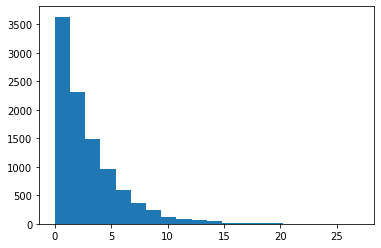

In [ ]:
# Exponential Distribution

n = 10000
n_bins = 20
lam = 1/3

u = np.random.uniform(0, 1, n)
x = (-1/lam)*np.log(1-u)

plt.hist(x, bins = n_bins)

(array([3.470e+02, 8.450e+02, 1.262e+03, 1.407e+03, 1.371e+03, 1.300e+03,
        1.049e+03, 8.530e+02, 6.250e+02, 4.200e+02, 2.460e+02, 1.410e+02,
        7.900e+01, 2.500e+01, 1.700e+01, 6.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.03405139,  0.54633408,  1.05861677,  1.57089946,  2.08318215,
         2.59546483,  3.10774752,  3.62003021,  4.1323129 ,  4.64459559,
         5.15687828,  5.66916097,  6.18144366,  6.69372634,  7.20600903,
         7.71829172,  8.23057441,  8.7428571 ,  9.25513979,  9.76742248,
        10.27970516]),
 <a list of 20 Patch objects>)

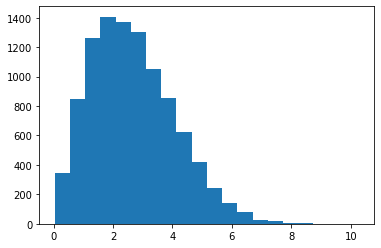

In [ ]:
# Weibull Distribution

n = 10000
n_bins = 20
lam = 1/3
beta = 2

u = np.random.uniform(0, 1, n)
x = (1/lam)*(-np.log(1-u))**(1/beta)

plt.hist(x, bins = n_bins)

(array([ 60., 157., 238., 370., 460., 586., 652., 775., 803., 930., 971.,
        858., 761., 629., 567., 403., 320., 260., 152.,  48.]),
 array([0.00766159, 0.10693191, 0.20620224, 0.30547256, 0.40474289,
        0.50401321, 0.60328354, 0.70255386, 0.80182419, 0.90109451,
        1.00036483, 1.09963516, 1.19890548, 1.29817581, 1.39744613,
        1.49671646, 1.59598678, 1.69525711, 1.79452743, 1.89379776,
        1.99306808]),
 <a list of 20 Patch objects>)

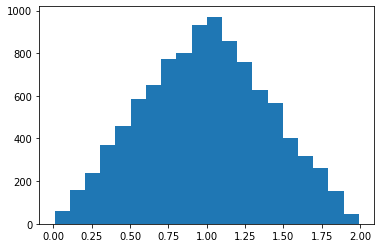

In [ ]:
# Triangular Distribution
# An example of generating Tria(0,1,2)
# We have to first solve for X, using the inverse cdf of Tria(0,1,2)

def func(z):
    ''' Triangular distribution Tria(0, 1, 2)
    '''
    if z < 0.5:
        return np.sqrt((2*z))
    else:
        return 2 - np.sqrt(2*(1-z))

n = 10000
u = np.random.uniform(0, 1, n)
x = np.vectorize(func)(u)

plt.hist(x, bins=n_bins)

Piecewise((0, x <= 0), (x**2/2, x < 1), (-x**2/2 + 2*x - 1, x <= 2), (1, True))


(array([15., 28., 30., 47., 58., 60., 66., 72., 82., 85., 92., 77., 59.,
        60., 45., 45., 38., 23., 15.,  3.]),
 array([0.09624991, 0.1902493 , 0.28424868, 0.37824806, 0.47224744,
        0.56624683, 0.66024621, 0.75424559, 0.84824497, 0.94224436,
        1.03624374, 1.13024312, 1.2242425 , 1.31824189, 1.41224127,
        1.50624065, 1.60024003, 1.69423942, 1.7882388 , 1.88223818,
        1.97623756]),
 <a list of 20 Patch objects>)

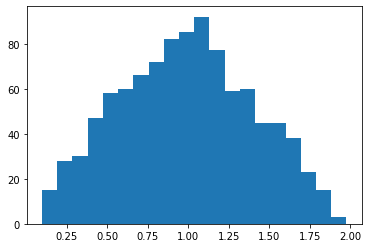

In [ ]:
# We can use sympy instead to generate from any Tria(a, b, c) "directly"
# Using the cdf directly as we have done in the uniform distribution case
# did not seem to work, so we will use the pdf instead, and compute the
# cdf first, which produces it in peicewise form, that we can then use to
# get an expression for X. A little long-winded, but it's a way to automate
# the R.V generation for any Tria(a,b,c)

# Triangular Distribution

from sympy.stats import Triangular
from sympy import nan

n = 1000
a, b, c = 0, 2, 1
unifs = np.random.uniform(0, 1, n)

x = Symbol("x")
u = Symbol("u")

# Define triangular distribution, and its pdf, and cdf
D = Triangular("d", a, b, c)

pdf = density(D)(x)
F_x = integrate(pdf, (x))
print(F_x)

# Solve for X
eqn = Eq(F_x, u)
expr = solve(eqn, x)

# generate X's using uniforms
xvals = []
for uval in unifs:
    for i in range(len(expr)):
        ans = expr[i].subs({u: uval}).evalf()
        xvals.append(ans)

xvals = [xval for xval in xvals if xval != nan]
xvals = np.array(xvals).astype(np.float64)


# # Plot results
n_bins = 20
plt.hist(xvals, bins=n_bins)

# **Discrete Distributions**

(array([2525.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 7475.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

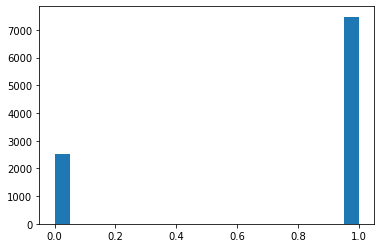

In [ ]:
# Bernoulli Distribution

def func(z, p):
    if z <= 1-p:
        return 0
    else:
        return 1

n = 10000
p = 0.75
u = np.random.uniform(0, 1, n)
x = np.vectorize(func)(u, p=p)

plt.hist(x, bins = n_bins)

(array([5.184e+03, 1.464e+03, 1.016e+03, 7.100e+02, 5.060e+02, 3.260e+02,
        2.380e+02, 1.800e+02, 1.220e+02, 8.300e+01, 8.700e+01, 2.600e+01,
        1.200e+01, 1.600e+01, 1.200e+01, 5.000e+00, 4.000e+00, 2.000e+00,
        3.000e+00, 4.000e+00]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ,
        13.1, 14.2, 15.3, 16.4, 17.5, 18.6, 19.7, 20.8, 21.9, 23. ]),
 <a list of 20 Patch objects>)

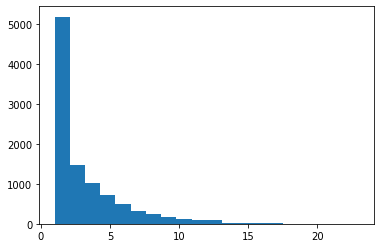

In [ ]:
# Geometric Distribution

# Method 1:
# X = min[k: 1-q**k >= U] = ceil(1-U) / ceil(1-p) = ln(U) / ceil(1-p)

def func(u, q):
    k = 1
    while True:
        if 1 - q**k >= u:
            return k
        k += 1
    
n = 100
p = 0.3
q = 1-p
unifs = np.random.uniform(0, 1, n)
x = np.vectorize(func)(u, q)

plt.hist(x, bins=n_bins)

(array([35., 23., 13.,  9.,  4.,  5.,  2.,  4.,  2.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ,
        10.9, 11.8, 12.7, 13.6, 14.5, 15.4, 16.3, 17.2, 18.1, 19. ]),
 <a list of 20 Patch objects>)

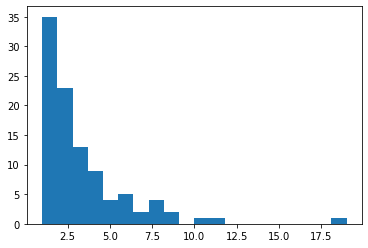

In [ ]:
# Geometric Distribution

# Method 2:
# Count number of trials until U_i <= p

def func(r, p):
    num_trials = 1
    while True:
        unif = np.random.uniform()
        if unif <= p:
            return num_trials
        num_trials += 1
    
n = 100
p = 0.3
r = range(n)
x = np.vectorize(func)(r, p)

plt.hist(x, bins=n_bins)

In [ ]:
# TBD Poisson Distribution

In [ ]:
# TBD Generating from unknown distributions